In [22]:
import pandas as pd
import keras
import pickle
import os
import json
import matplotlib.pyplot as plt


from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


%matplotlib inline

## Loading exported features

In [6]:
with open('/Volumes/Macintosh HD - Data/Users/admin/Documents/HD Drive/DataProjects_Data/DepressionData/feature.pkl','rb') as f:
    features = pickle.load(f)

In [16]:
features['303'].shape

(68, 39411)

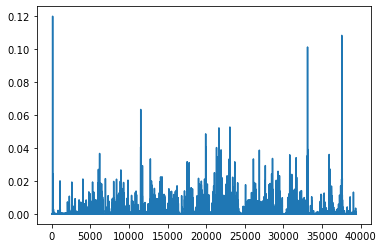

In [20]:
fig = plt.figure()
plt.plot(features['303'][1])

In [24]:
[Fs, x] = audioBasicIO.read_audio_file("/Volumes/Macintosh HD - Data/Users/admin/Documents/HD Drive/DataProjects_Data/DepressionData/audio/301_AUDIO.wav")
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050 * Fs, 0.025 * Fs)

In [ ]:

#creating CNN

model = Sequential()
model.add(Conv2D(20,(5,5),strides=2,activation = 'relu'))
model.add(MaxPooling2D(pool_size =(5,5)))
model.add(Conv2D(20,kernel_size=5,strides = 2,activation = 'relu'))
model.add(Flatten())
model.add(Dense(300,activation = 'relu'))
model.add(Dense(300,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='Softmax'))

model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])



#fitting the data
model.fit(TrainX,TrainY,epochs = 50, verbose = 1, )

